# This is starting to look like a real notebook!
## The more hashtags I start a line with, the smaller the heading
###### Five or six is the smallest number that will be treated as a heading
And I don't even need any hashtags at all, and my test will still not be trated as Python code

In [2]:
print("My very first Jupyter notebook!")

My very first Jupyter notebook!


In [2]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
print("Imports completed")

Imports completed


In [3]:
imageFilename = "C:/temp/sfu.tif"  # Or wherever you have the sfu.tif file
image_ds = gdal.Open(imageFilename)
if image_ds is None:
    print(imageFileName + " could not open properly")
    sys.exit(1)
else:
    print(imageFilename + " opened correctly")

C:/temp/sfu.tif opened correctly


#### In the following, I will condense the code a bit compared to what we have done earlier in the instructions, but the general idea is to read the image, calculate the brightness, and then display it.

In [20]:
xsize = image_ds.RasterXSize
ysize = image_ds.RasterYSize
nbands = image_ds.RasterCount
image_projection = image_ds.GetProjection()
image_geotransform = image_ds.GetGeoTransform()

bands = []  # Create empty list called ‘bands’
arrays = []  # Create empty list called ‘arrays’
for i in range(nbands): # Loop through bands
    bands.append(image_ds.GetRasterBand(i + 1))
    arrays.append(bands[i].ReadAsArray())
    
brightness = (arrays[0].astype(float) + arrays[1] + arrays[2]) / 3

#### Ok, we're done with reading the data from the image, and calculating the average per-pixel brightness. Now it's time to plot the images to show what we have done:

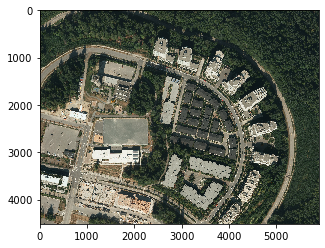

In [22]:
# First plot the RGB image
rgb = np.dstack((arrays[0],arrays[1],arrays[2]))  # # This combines the three 2D arrays into a single 3D array
plt.figure(figsize=(5,5))
plt.imshow(rgb)
plt.show()

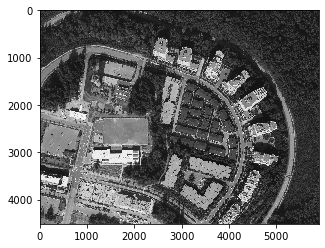

In [21]:
# Then plot the brightness image
plt.figure(figsize=(5,5))
plt.imshow(brightness, cmap='gray', vmin=0, vmax=255)
plt.show()